# Lecture 4.1 - Basis Expansion - Adding non-linearity to linear methods.  

## What you'll learn today
1.  How to extend linear methods (regression, logistic regression, SVM, etc.) to model non-linear behavior
2.  How to generate new features to better model complicated data. 
3.  How to judge whether basis expansion improves your results. 


## References
http://www.physics.utah.edu/~bolton/bspline08.pdf  
https://github.com/johntfoster/bspline/blob/master/bspline.py  
http://johntfoster.github.io/posts/pythonnumpy-implementation-of-bspline-basis-functions.html  
http://devosaurus.blogspot.com/2013/10/exploring-b-splines-in-python.html  
https://www.cs.mtu.edu/~shene/COURSES/cs3621/NOTES/spline/B-spline/bspline-basis.html  
http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf - see page 143 for spline discussion

## What is basis expansion
Basis expansion means adding new features that are functions of your old features.  Adding new features may improve your performance.  

### Adding new features may improve performance

The figure below gives and example where adding a new feature can make a dramatic improve in linear classifier performance.  The figure on the left shows the original problem.  One class (designated by red circles) are completely enclosed by the other class (black x's).  This will be a tough problem for a linear classifier.  A straight line in the plane isn't going to do as well as you can do with your eye.  On the other hand, If you add a new feature which is the sum of squares of the old features, then you can see how the new feature makes it possible to linearly separate the red circles from the black x's.  

<img src='images/7FyLd.jpg'>

Here are some examples to demonstrate how that might work.  

###  Simple regression examples

Suppose that you're given a problem like the one in the simple code example below.  

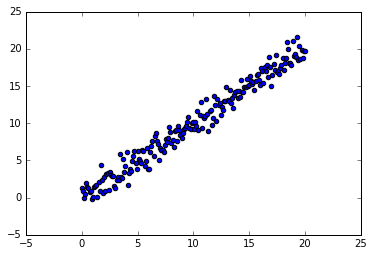

((200, 1), (200, 1))


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

#generate x values
x = np.linspace(0.0, 20.0, 200).reshape((200,1))

#add a little noise for y
y = x + np.random.normal(size=x.shape)
plt.scatter(x,y)
plt.show()
print(x.shape, y.shape)

It's easy to fit a straight line using linear_model.  Here's the code and the resulting plot

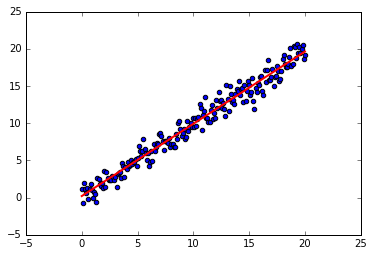

In [16]:
lm = LinearRegression()
lm.fit(x,y)
lm.coef_.shape
yHat = lm.intercept_ + lm.coef_ * x
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')


That was easy and worked well.  Let's change the problem a little.  Suppose that instead of $y = x$,  $\,\,y = x^2 /\, 20$.  Then what happens?  

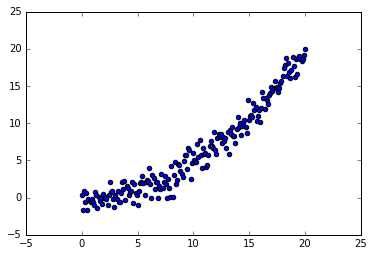

((200, 1), (200, 1))


In [18]:
#here y is related to the square of the attribute
y = x*x / 20.0 + np.random.normal(size=x.shape)
plt.scatter(x,y)
plt.show()
print(x.shape, y.shape)

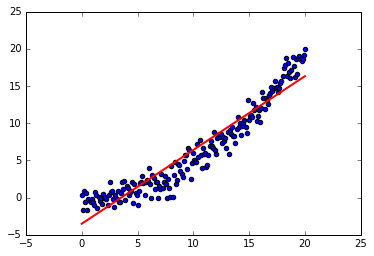

In [19]:
lm = LinearRegression()
lm.fit(x,y)
lm.coef_.shape
yHat = lm.intercept_ + lm.coef_ * x
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')

Now the straight line doesn't fit very well.  But suppose we add a new variable.  Instead of just trying to predict y with x, you add a new variable $x^2$

In [20]:
X = np.concatenate((x, x*x), axis=1)
X.shape

(200, 2)

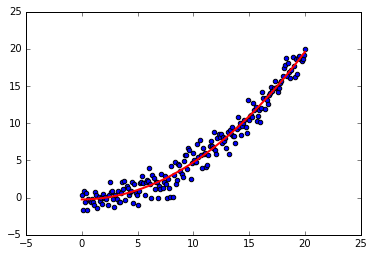

In [25]:
lm = LinearRegression()
lm.fit(X,y)
lm.coef_.shape
yHat = lm.intercept_ + np.dot(X, np.transpose(lm.coef_ ))
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')

## How to implement basis expansion

Usually you're not going to know what functions of the original attributes are going to give you the most performance improvement.  You have to try a few things and see what works.  It would be reasonable to add in squares and cross products of your original attributes to see if that helps.  Each row in your data matrix would go from $[x_1, x_2, ... , x_n]$ to $[x_1, x_2, ... , x_n, x_1^2, x_2^2, ... , x_n^2, x_1*x_2, x_1*x_3, etc]$

Remember that adding new features is going to increase your feature space size and you'll be more likely to overfit with OLS.  Now that you've got an approach for regularizing  regression and logistic regression, you can let your penalized algorithm take care of avoiding overfitting.  

## What if the function relating attribute to label isn't well modeled by polynomial?
Suppose that the functional relationship between the attributes and the labels radically different from linear plus quadratic.  The simple example below will illustrate.  


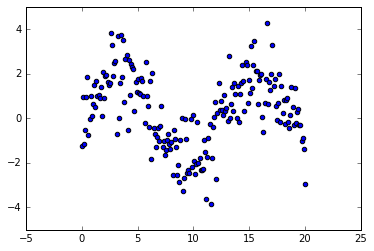

In [12]:
#here y is related to the square of the attribute
y = 2.0*np.sin(x/2.0) + np.random.normal(size=x.shape)
plt.scatter(x,y)
plt.show()


## Approximating unknown functions with spline functions
If you can find a family of functions that you can add together (with coefficients) to approximate the function you're tryin to machine learn, then you can use penalized regression (or other linear method) to find the best values of the coefficients and to prevent over-fitting.  Throwing in quadratic (and higher) terms may work but that process has some inherent difficulties with fitting arbitrary functions.  This brings us to spline functions.  Elements of statistical learning has a good explanation of spline functions.  http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf - see page 143 for spline discussion.  


https://www.cs.mtu.edu/~shene/COURSES/cs3621/NOTES/spline/B-spline/bspline-basis.html - has an easy to understand equations for generating spline functions of all orders.  

http://www.physics.utah.edu/~bolton/bspline08.pdf - gives a good visual explanation

We're using a program put together by John Foster and available on his github page.  https://github.com/johntfoster/bspline/blob/master/bspline.py  


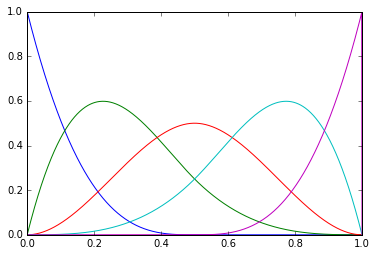

In [13]:
from bspline import Bspline
from bspline import Bspline

knot_vector = [0,0,0,0,0.5,1,1,1,1]
basis = Bspline(knot_vector,3)

%matplotlib inline
basis.plot()

In [14]:
#Use the __call__ function to retrieve 
basis.__call__(0.5)

array([ 0.  ,  0.25,  0.5 ,  0.25,  0.  ])

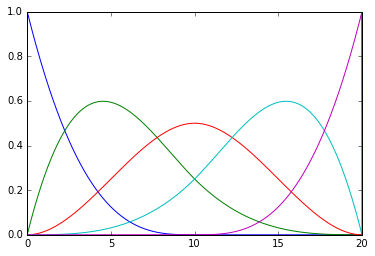

[ 1.  0.  0.  0.  0.]


In [15]:
#Use this for the problem of approximating sin(x)
#define the knot vector using the max and min of the data (how would you define knots for a general problem?)
knot_vector = [0.0, 0.0, 0.0, 0.0, 10.0, 20.0, 20.0,20.0,20.0]
basis = Bspline(knot_vector, 3)
basis.plot()
basisExample = basis.__call__(knot_vector[0])
print(basisExample)
#Build new feature matrix - old features replaced by vector of b-spline basis functions
nFeatures = len(basisExample)
X = np.zeros((len(x), nFeatures))
for i in range(len(x)):
    X[i,:] = basis.__call__(x[i,0])

In [16]:
print(X[0,:], basis.__call__(x[0,0]))  #check to see that the first row of data = basis functions for first attribute

(array([ 1.,  0.,  0.,  0.,  0.]), array([ 1.,  0.,  0.,  0.,  0.]))


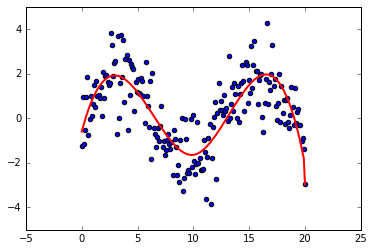

In [17]:
lm = LinearRegression()
lm.fit(X,y)
lm.coef_.shape
yHat = lm.intercept_ + np.dot(X, np.transpose(lm.coef_ ))
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')

## Laboratory Exercise 4.1 - Applying basis expansion
Use basis expansion to increase the number of features in breast cancer data set.  Take two approaches.  For one approach, simple add the squares of the features to the feature matrix.  For the second use cubic spline basis functions.  To solve this you can use sklearn.linear_model.SGDClassifier.  Here's a link to the package documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html . Choose the options for SCDClassifier so that you get logistic regression with an elastic net penalty.